<a href="https://colab.research.google.com/github/satvik-dixit/ML_Forex_Forecasting/blob/main/random_forest_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/satvik-dixit/ML_Forex_Forecasting
! pip install finta


Cloning into 'ML_Forex_Forecasting'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 70 (delta 25), reused 34 (delta 10), pack-reused 0
Receiving objects: 100% (70/70), 326.62 KiB | 4.19 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [2]:
import sys
sys.path.append('/content/ML_Forex_Forecasting')
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from generate_features import generate_features
# from maximum_profit_path import find_maximum_profit_path
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
usd_eur = pd.read_csv("/content/ML_Forex_Forecasting/USDEUR=X.csv", parse_dates=['Date'])
usd_gbp = pd.read_csv("/content/ML_Forex_Forecasting/USDGBP=X.csv", parse_dates=['Date'])
usd_chf = pd.read_csv("/content/ML_Forex_Forecasting/USDCHF=X.csv", parse_dates=['Date'])
eur_gbp = pd.read_csv("/content/ML_Forex_Forecasting/EURGBP=X.csv", parse_dates=['Date'])
eur_chf = pd.read_csv("/content/ML_Forex_Forecasting/EURCHF=X.csv", parse_dates=['Date'])
gbp_chf = pd.read_csv("/content/ML_Forex_Forecasting/GBPCHF=X.csv", parse_dates=['Date'])
print(f"USD/EUR: {usd_eur.shape}")
display(usd_eur.head())
print(f"USD/GBP: {usd_gbp.shape}")
display(usd_gbp.head())
print(f"USD/CHF: {usd_chf.shape}")
display(usd_chf.head())
print(f"EUR/GBP: {eur_gbp.shape}")
display(eur_gbp.head())
print(f"EUR/CHF: {eur_chf.shape}")
display(eur_chf.head())
print(f"GBP/CHF: {gbp_chf.shape}")
display(gbp_chf.head())

USD/EUR: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,1.02117,1.02526,1.01582,1.02117,1.02117,0
1,2022-10-04,1.01708,1.01971,1.00199,1.01708,1.01708,0
2,2022-10-05,1.00157,1.01673,1.00058,1.00157,1.00157,0
3,2022-10-06,1.00898,1.02152,1.00742,1.00898,1.00898,0
4,2022-10-07,1.02155,1.02757,1.01874,1.02155,1.02155,0


USD/GBP: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,0.89795,0.90188,0.88243,0.89762,0.89762,0
1,2022-10-04,0.88186,0.88635,0.87367,0.88229,0.88229,0
2,2022-10-05,0.87332,0.89065,0.86995,0.87326,0.87326,0
3,2022-10-06,0.88060,0.89925,0.87847,0.88064,0.88064,0
4,2022-10-07,0.89564,0.90155,0.89097,0.89589,0.89589,0


USD/CHF: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,0.98565,0.99314,0.98351,0.98565,0.98565,0
1,2022-10-04,0.99256,0.99408,0.97948,0.99256,0.99256,0
2,2022-10-05,0.97869,0.98883,0.97844,0.97869,0.97869,0
3,2022-10-06,0.98132,0.99133,0.97790,0.98132,0.98132,0
4,2022-10-07,0.98997,0.99492,0.98790,0.98997,0.98997,0


EUR/GBP: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,0.87895,0.88302,0.86776,0.87895,0.87895,0
1,2022-10-04,0.86740,0.87415,0.86506,0.86740,0.86740,0
2,2022-10-05,0.87183,0.87761,0.86945,0.87183,0.87183,0
3,2022-10-06,0.87252,0.88144,0.87175,0.87252,0.87252,0
4,2022-10-07,0.87692,0.88065,0.87362,0.87692,0.87692,0


EUR/CHF: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,0.96513,0.97646,0.96430,0.96513,0.96513,0
1,2022-10-04,0.97578,0.97984,0.97390,0.97578,0.97578,0
2,2022-10-05,0.97714,0.97961,0.97043,0.97714,0.97714,0
3,2022-10-06,0.97264,0.97379,0.96920,0.97264,0.97264,0
4,2022-10-07,0.96909,0.97137,0.96770,0.96909,0.96909,0


GBP/CHF: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,1.09778,1.12295,1.09302,1.09778,1.09778,0
1,2022-10-04,1.12474,1.12827,1.11793,1.12474,1.12474,0
2,2022-10-05,1.12057,1.12641,1.10700,1.12057,1.12057,0
3,2022-10-06,1.11404,1.11585,1.10107,1.11404,1.11404,0
4,2022-10-07,1.10497,1.11150,1.10139,1.10497,1.10497,0


In [4]:
usd_eur_feats = generate_features(usd_eur)
print(f"USD/EUR Features shape: {usd_eur_feats.shape}")
display(usd_eur_feats.head())

usd_gbp_feats = generate_features(usd_gbp)
print(f"USD/GBP Features shape: {usd_gbp_feats.shape}")
display(usd_gbp_feats.head())

usd_chf_feats = generate_features(usd_chf)
print(f"USD/CHF Features shape: {usd_chf_feats.shape}")
display(usd_chf_feats.head())

eur_gbp_feats = generate_features(eur_gbp)
print(f"EUR/GBP Features shape: {eur_gbp_feats.shape}")
display(eur_gbp_feats.head())

eur_chf_feats = generate_features(eur_chf)
print(f"EUR/CHF Features shape: {eur_chf_feats.shape}")
display(eur_chf_feats.head())

gbp_chf_feats = generate_features(gbp_chf)
print(f"GBP/CHF Features shape: {gbp_chf_feats.shape}")
display(gbp_chf_feats.head())

USD/EUR Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.945199,0.996826,0.999919,-0.000297,0.946022,0.230960,0.939264,1.043249,0.230263,...,-44.808354,-58.111639,-64.826924,-4996.040203,47.614688,-10.622861,0.005220,0.004834,47.614688,0.94170
1,2023-11-02,0.945213,1.000000,1.000076,0.000419,0.945956,-0.184693,0.994176,0.263142,-0.185466,...,-10.041835,-21.770090,-53.061082,-6097.737760,51.275082,-0.483403,0.006265,0.006210,51.275082,0.94455
2,2023-11-01,0.945341,1.004797,0.999876,-0.000406,0.945648,-0.058054,0.965507,0.226175,0.058802,...,82.678343,25.798779,-57.688552,-5459.928285,52.203439,2.113941,0.006301,0.006209,52.203439,0.94526
3,2023-10-31,0.944310,1.000000,1.000519,-0.004140,0.945353,-0.087002,1.141539,-2.447429,-0.088737,...,-54.787025,-499.185756,-75.719455,-5478.404035,48.284815,-9.476169,0.006006,0.005699,48.284815,0.94206
4,2023-10-30,0.943330,1.000000,0.999855,0.002468,0.945023,-0.000623,0.963464,-0.175680,-0.000844,...,2.147863,40.325085,3.008271,-5451.325514,54.348908,7.278908,0.007211,0.007361,54.348908,0.94675


USD/GBP Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.823231,1.000000,0.999889,-0.000276,0.821072,-0.179897,0.808378,1.356847,-0.179301,...,-15.026854,-50.165482,-7.078591,-4051.053097,51.687019,-2.674181,0.005467,0.004628,51.687019,0.82022
1,2023-11-02,0.823912,1.000000,0.999851,0.001898,0.820840,-0.229951,0.971252,0.675367,-0.230877,...,-31.940389,-55.247536,-41.193164,-5610.241052,52.602051,-0.170413,0.006338,0.005738,52.602051,0.82087
2,2023-11-01,0.824287,1.000000,1.000006,-0.001609,0.820350,-0.496679,0.733868,-2.219949,0.495984,...,16.925487,11.587914,-44.129581,-5596.422127,55.448772,7.610794,0.007209,0.006962,55.448772,0.82290
3,2023-10-31,0.822878,1.012431,1.000526,-0.003502,0.819682,-0.184176,0.902304,3.676040,-0.183467,...,-39.372760,-2418.833356,-48.260024,-4705.742770,54.410492,4.577080,0.007374,0.007279,54.410492,0.82198
4,2023-10-30,0.822007,1.000000,0.999801,0.001999,0.819137,0.195531,0.896475,0.360256,-0.195919,...,21.557599,61.379625,149.349642,-4593.634588,59.337534,17.951895,0.008029,0.008395,59.337534,0.82551


USD/CHF Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.904123,1.000000,1.000192,-0.003185,0.905757,0.002466,0.847524,2.169895,0.002331,...,-4.994679,-40.999972,163.405304,-4219.522306,55.677407,14.462076,-0.011683,-0.009219,55.677407,0.90610
1,2023-11-02,0.901706,1.000000,1.000731,-0.003333,0.905607,0.262515,0.843025,-2.299338,-0.262998,...,62.853837,-44.558076,-22907.703488,-4222.041774,55.101292,12.912282,-0.012802,-0.010028,55.101292,0.90555
2,2023-11-01,0.898767,1.000000,1.000392,-0.003243,0.905264,-0.044819,1.006512,0.490528,-0.044918,...,-53.372982,-71.228831,-253.386768,-4202.573153,60.769001,29.190840,-0.014130,-0.011110,60.769001,0.90980
3,2023-10-31,0.896256,1.018195,1.000557,-0.003197,0.904894,0.150084,1.264603,0.374426,0.150191,...,2.400838,-44.141915,-1183.608191,-4367.036936,52.507979,7.281077,-0.018135,-0.016202,52.507979,0.90206
4,2023-10-30,0.894340,1.000000,1.000164,-0.000342,0.904763,-0.077281,1.134906,0.381291,-0.077398,...,-20.133411,-39.380663,1209.186156,-4711.806534,52.962893,8.609686,-0.019812,-0.018303,52.962893,0.90240


EUR/GBP Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.870947,1.000000,0.999947,-0.000017,0.867811,-0.011513,1.021695,1.699038,-0.011276,...,-114.192859,-264.160659,-104.256228,-7160.362363,56.730784,11.865286,0.000678,0.000122,56.730784,0.87077
1,2023-11-02,0.871637,0.996344,0.999789,0.001560,0.867625,-0.050046,1.062432,-5.339855,0.049902,...,-1125.427984,-163.979720,-68.067442,-7175.092313,52.854249,0.285988,0.000708,0.000127,52.854249,0.86897
2,2023-11-01,0.871884,0.989384,1.000117,-0.001315,0.867397,-0.107403,1.039432,0.786552,-0.107570,...,-91.707520,-73.665545,-104.017460,-7160.935194,57.447552,13.144303,0.001625,0.001469,57.447552,0.87070
3,2023-10-31,0.871353,1.000000,1.000087,0.000039,0.867143,-0.106450,1.040746,0.415297,-0.106924,...,36.935279,424.065073,-148.701592,-6661.832805,62.395395,27.615052,0.001993,0.002166,62.395395,0.87240
4,2023-10-30,0.871324,1.000000,0.999925,-0.000157,0.866732,0.520895,1.054214,-2.308267,0.520901,...,-1093.331617,-21653.631285,-132.259980,-7032.040940,61.489538,25.078593,0.001603,0.001854,61.489538,0.87190


EUR/CHF Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.956503,1.000000,1.000285,-0.003062,0.957482,0.001027,1.193785,-1.518097,-0.000812,...,-17.715395,-45.247741,4.763145,-4277.713016,58.312440,23.856903,-0.017820,-0.014858,58.312440,0.96188
1,2023-11-02,0.953924,1.002997,1.000698,-0.003977,0.957282,-0.062039,1.020789,-0.485885,-0.062539,...,26.256782,-38.147053,33.000932,-4615.128319,54.756242,15.132448,-0.019972,-0.016985,54.756242,0.95866
2,2023-11-01,0.950673,1.000000,1.000542,-0.003011,0.957335,-0.049521,1.054781,0.573885,-0.048820,...,-25.509306,-53.055016,13.928149,-4670.441112,60.369975,30.989510,-0.021410,-0.018125,60.369975,0.96244
3,2023-10-31,0.949086,1.000000,1.000065,0.000835,0.957223,-0.001675,1.153613,-2.387419,0.000493,...,-18.544837,-26.839509,30.000779,-4758.585946,54.751880,17.681247,-0.025344,-0.022992,54.751880,0.95751
4,2023-10-30,0.948062,0.989971,1.000330,-0.002952,0.957260,0.058298,1.110867,-0.376416,0.057322,...,-13.142346,-23.355519,142.940802,-5352.808927,48.728160,2.592755,-0.028343,-0.026908,48.728160,0.95311


GBP/CHF Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,1.098108,1.005885,1.000397,-0.003563,1.103094,0.116590,1.151331,0.736755,0.116714,...,-7.670248,-43.791936,71.708539,-3385.417666,54.088195,16.722381,-0.021694,-0.017577,54.088195,1.10454
1,2023-11-02,1.094267,1.559925,1.000684,-0.004143,1.103182,-0.001052,0.890391,1.927215,0.002068,...,13.133722,-48.110366,91.700888,-4095.250576,52.708517,13.327550,-0.024217,-0.020040,52.708517,1.10306
2,2023-11-01,1.090227,1.003856,1.000474,-0.001870,1.103421,0.077613,0.942221,0.545523,0.077575,...,-31.683935,-53.125802,69.952833,-3808.958122,55.032730,19.990483,-0.027019,-0.023028,55.032730,1.10530
3,2023-10-31,1.089054,1.000000,0.999972,0.000913,1.103683,0.322712,1.218012,-4.803268,0.323477,...,-14.780511,-19.996582,98.210978,-3594.346954,47.431895,1.605056,-0.032034,-0.029537,47.431895,1.09739
4,2023-10-30,1.087868,0.992456,1.000484,-0.003337,1.104264,0.940678,1.079046,-2.756637,0.941737,...,-7.572093,-19.197176,369.827863,-3324.149442,42.490729,-10.956348,-0.034980,-0.033626,42.490729,1.09306


In [5]:
def random_forest_prediction_plot(dataset):
    data = dataset.copy()
    data = data.iloc[::-1]
    forecast_days = 5

    for i in range(1, forecast_days + 1):
        data[f'close_t-{i}'] = data['Close'].shift(i)
    data.dropna(inplace=True)

    X = data.drop(columns=['Close', 'Date', 't'])
    y = data['Close']

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    rf_model = RandomForestRegressor(random_state=0)

    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_rf_model = grid_search.best_estimator_

    actual_prices = list(y[-forecast_days:])
    last_observation = X.iloc[-1]
    forecast = []

    for _ in range(forecast_days):
        prediction = best_rf_model.predict([last_observation])[0]
        forecast.append(prediction)
        last_observation = last_observation.shift(periods=-1)
        last_observation[-1] = prediction

    next_5_predictions = []
    for _ in range(forecast_days):
        prediction = best_rf_model.predict([last_observation])[0]
        next_5_predictions.append(prediction)
        last_observation = last_observation.shift(periods=-1)
        last_observation[-1] = prediction

    mse = mean_squared_error(y[-forecast_days:], forecast)
    print('MSE for 5 days:', mse)

    return actual_prices, forecast, next_5_predictions


In [6]:
import matplotlib.pyplot as plt

def plot(actual, forecast):
    plt.figure(figsize=(10, 6))
    plt.plot([1, 2, 3, 4, 5], forecast, label='Predicted')
    plt.plot([1, 2, 3, 4, 5], actual, label='Actual')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.title('Exchange Rate Forecast')
    plt.legend()


MSE for 5 days: 7.760599965001076e-05


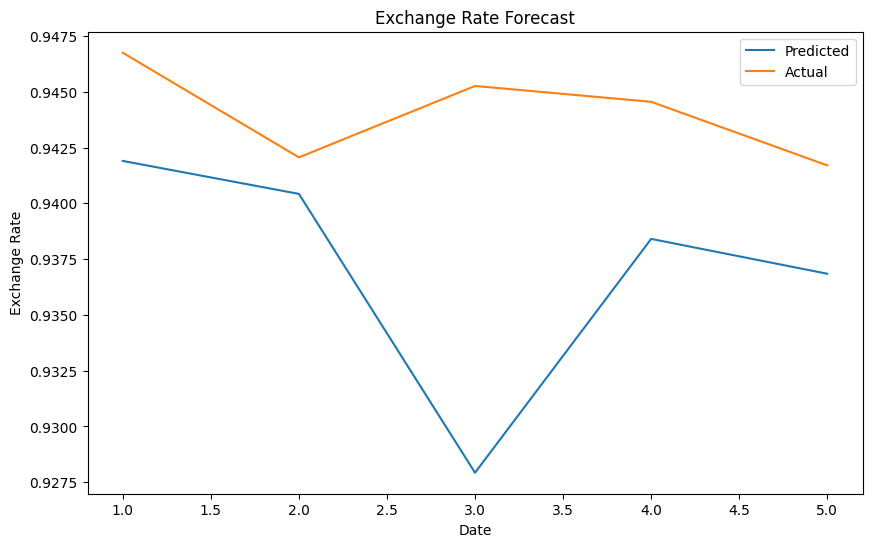

In [7]:
conversion_rates = np.zeros((5, 6))

actual, forecast, next_5 = random_forest_prediction_plot(usd_eur_feats)
plot(actual, forecast)
conversion_rates[:, 0] = next_5

MSE for 5 days: 0.0001204323144619941


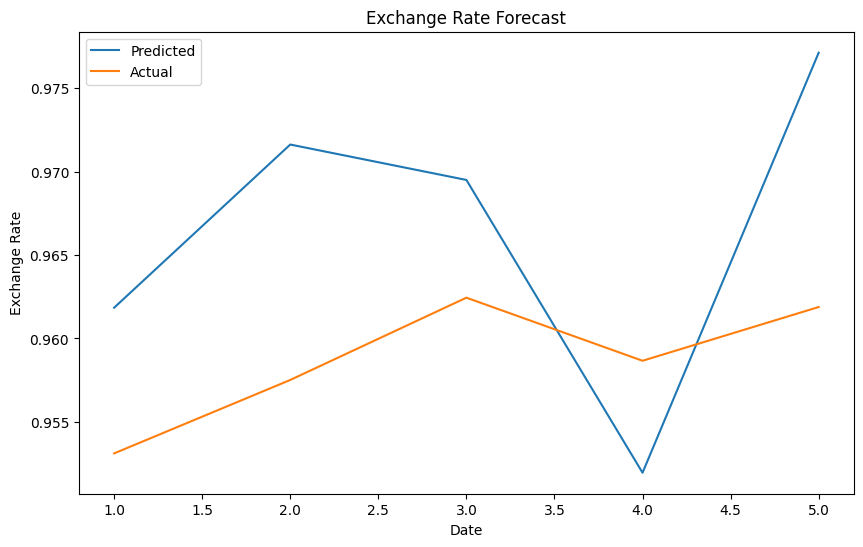

In [8]:
actual, forecast, next_5 = random_forest_prediction_plot(eur_chf_feats)
plot(actual, forecast)
conversion_rates[:, 1] = next_5

MSE for 5 days: 1.4847239038281634e-05


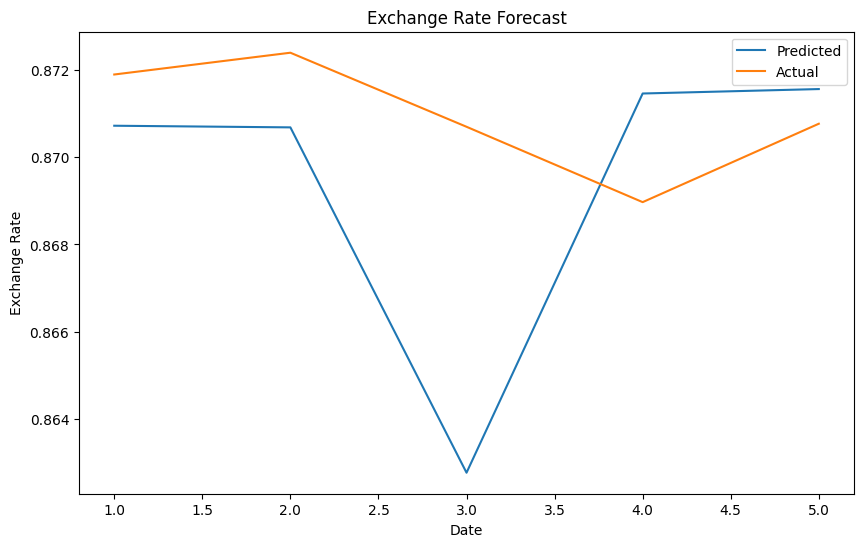

In [9]:
actual, forecast, next_5 = random_forest_prediction_plot(eur_gbp_feats)
plot(actual, forecast)
conversion_rates[:, 2] = next_5

MSE for 5 days: 0.00016205750671866086


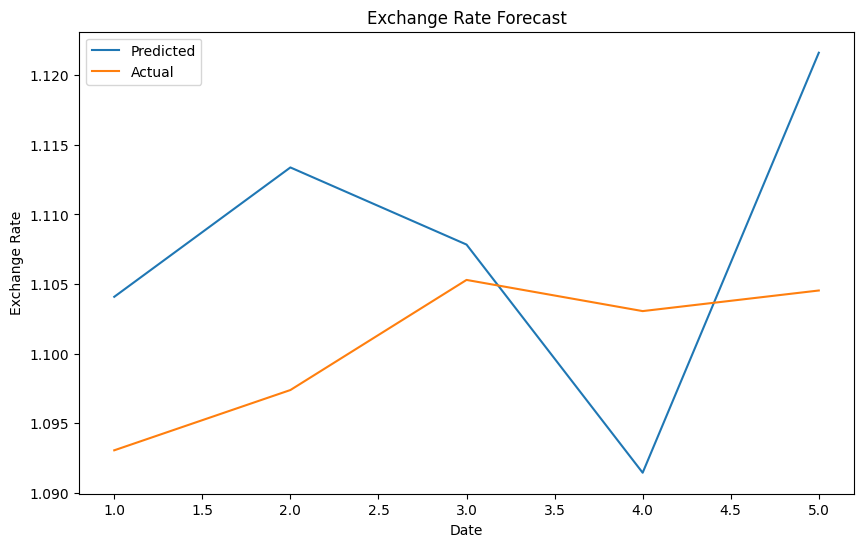

In [10]:
actual, forecast, next_5 = random_forest_prediction_plot(gbp_chf_feats)
plot(actual, forecast)
conversion_rates[:, 3] = next_5

MSE for 5 days: 0.0008476956751178816


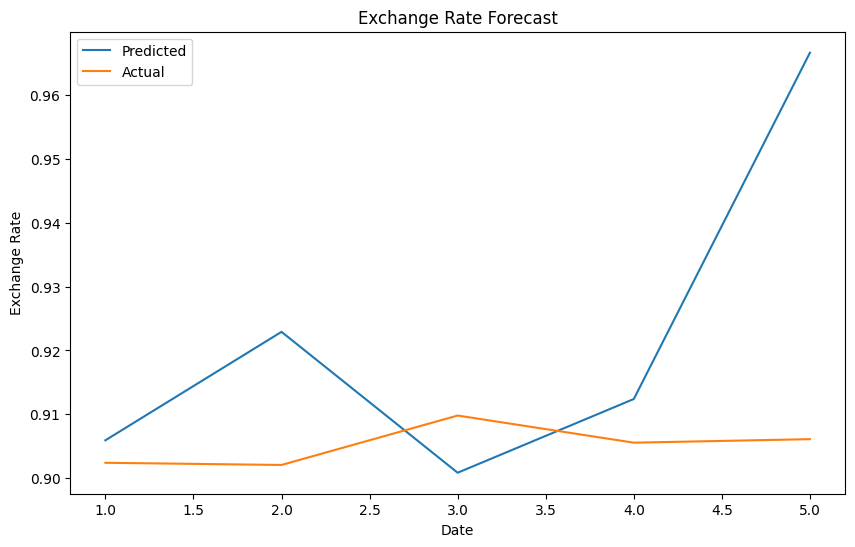

In [11]:
actual, forecast, next_5 = random_forest_prediction_plot(usd_chf_feats)
plot(actual, forecast)
conversion_rates[:, 4] = next_5

MSE for 5 days: 0.0001291039245404371


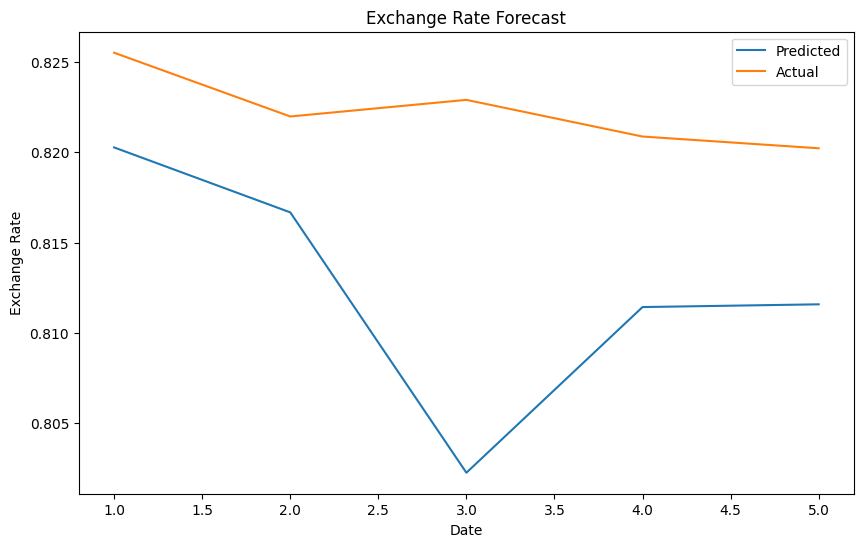

In [12]:
actual, forecast, next_5 = random_forest_prediction_plot(usd_gbp_feats)
plot(actual, forecast)
conversion_rates[:, 5] = next_5

In [13]:
print(conversion_rates)

[[0.93618253 0.9753324  0.87152295 1.12146363 0.86781302 0.8117893 ]
 [0.9719369  0.9768255  0.89174103 1.1225716  0.9655585  0.85679772]
 [0.89616187 1.0030263  0.871891   1.14814113 0.91698116 0.7694702 ]
 [0.9611669  0.9818074  0.8630591  1.12697563 0.88983993 0.83694277]
 [0.942775   0.9729148  0.87048827 1.1173201  0.92016964 0.81759363]]


In [14]:
def find_maximum_profit_path(conversion_rates):

    dp = []
    path = []

    curr = ['USD', 'EUR', 'CHF', 'GBP']
    prev_day = np.array([1, 0, 0, 0])

    for i in range(5):

        USD, EUR, CHF, GBP = prev_day
        USD_EUR, EUR_CHF, EUR_GBP, GBP_CHF, USD_CHF, USD_GBP = conversion_rates[i, :]
        EUR_USD, CHF_EUR, GBP_EUR, CHF_GBP, CHF_USD, GBP_USD = 1/conversion_rates[i, :]

        if i<=3:
            dp = np.array([max(USD*1, EUR*EUR_USD, CHF*CHF_USD, GBP*GBP_USD), max(USD*USD_EUR, EUR*1, CHF*CHF_EUR, GBP*GBP_EUR), max(USD*USD_CHF, EUR*EUR_CHF, CHF*1, GBP*GBP_CHF), max(USD*USD_GBP, EUR*EUR_GBP, CHF*CHF_GBP, GBP*1)])
            path.append(np.array([curr[np.argmax([USD*1, EUR*EUR_USD, CHF*CHF_USD, GBP*GBP_USD])], curr[np.argmax([USD*USD_EUR, EUR*1, CHF*CHF_EUR, GBP*GBP_EUR])], curr[np.argmax([USD*USD_CHF, EUR*EUR_CHF, CHF*1, GBP*GBP_CHF])], curr[np.argmax([USD*USD_GBP, EUR*EUR_GBP, CHF*CHF_GBP, GBP*1])]]))
            prev_day = dp

        elif i==4:
            dp = np.array([USD*1, EUR*EUR_USD, CHF*CHF_USD, GBP*GBP_USD])
            path.append(curr)

    final_path = ['USD']
    index = curr.index(path[-1][np.argmax(dp)])
    print(1000*np.max(dp))

    for i in range(4, -1, -1):
        prev_currency = path[i][index]
        final_path.append(prev_currency)
        index = curr.index(prev_currency)

    final_path.reverse()
    final_path = [final_path[i] + '-' + final_path[i+1] for i in range(5)]

    return final_path

In [15]:
final_path = find_maximum_profit_path(conversion_rates)
print(final_path)

1139.8422739630205
['USD-USD', 'USD-GBP', 'GBP-USD', 'USD-GBP', 'GBP-USD']
